In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

# Business Problem - 1

In [4]:
loan = pd.read_csv("C:\Mohit Personel\COURSES\Analytix Labs\Python for Data Science\Python Projects\Statistical python case study\Basic Statistics - Hypothesis Testing\LoansData.csv")
loan.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [7]:
loan['Interest.Rate']=loan['Interest.Rate'].str.replace('%','')

In [8]:
loan['Interest.Rate'] = pd.to_numeric(loan['Interest.Rate'])

In [12]:
loan.dropna(axis = 0, inplace = True)

### a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)


In [13]:
stats.pearsonr(loan['Amount.Funded.By.Investors'],loan['Interest.Rate'])

PearsonRResult(statistic=0.3315955311036452, pvalue=5.064256950483673e-63)

### b. Loan length is directly effecting intrest rate.

In [16]:
loan['Loan.Length'].value_counts()

36 months    1876
60 months     537
Name: Loan.Length, dtype: int64

In [19]:
l36 = loan.loc[loan['Loan.Length']=='36 months','Interest.Rate']

In [20]:
l60 = loan.loc[loan['Loan.Length']=='60 months','Interest.Rate']

In [23]:
print('Mean of l36 ' ,l36.mean())
print('Mean of l60 ' ,l60.mean())

Mean of l36  12.130074626865769
Mean of l60  16.378733705772785


In [24]:
stats.f_oneway(l36,l60)

F_onewayResult(statistic=531.6618311658129, pvalue=1.7938010673422317e-106)

### c. Inrest rate varies for different purpose of loans

In [28]:
dc = loan.loc[loan['Loan.Purpose']=='debt_consolidation','Interest.Rate']

In [29]:
cc = loan.loc[loan['Loan.Purpose']=='credit_card','Interest.Rate']

In [30]:
ot = loan.loc[loan['Loan.Purpose']=='other','Interest.Rate']

In [31]:
hi = loan.loc[loan['Loan.Purpose']=='home_improvement','Interest.Rate']

In [32]:
mp = loan.loc[loan['Loan.Purpose']=='major_purchase','Interest.Rate']

In [33]:
sb = loan.loc[loan['Loan.Purpose']=='small_business','Interest.Rate']

In [35]:
car = loan.loc[loan['Loan.Purpose']=='car','Interest.Rate']

In [36]:
wed = loan.loc[loan['Loan.Purpose']=='wedding','Interest.Rate']

In [37]:
mov = loan.loc[loan['Loan.Purpose']=='moving','Interest.Rate']

In [38]:
med = loan.loc[loan['Loan.Purpose']=='medical','Interest.Rate']

In [39]:
vac = loan.loc[loan['Loan.Purpose']== 'vacation','Interest.Rate']

In [40]:
house = loan.loc[loan['Loan.Purpose']=='house','Interest.Rate']

In [41]:
edu = loan.loc[loan['Loan.Purpose']=='educational','Interest.Rate']

In [42]:
re = loan.loc[loan['Loan.Purpose']=='renewable_energy','Interest.Rate']

In [43]:
stats.f_oneway(dc,cc,ot,hi,mp,sb,car,wed,mov,med,vac,house,edu,re)

F_onewayResult(statistic=7.330838185919651, pvalue=2.7646672581411367e-14)

### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [47]:
obs_freq = pd.crosstab(loan['FICO.Range'],loan['Home.Ownership'])

In [48]:
stats.chi2_contingency(obs_freq)

(269.7881202757335,
 3.087547281383599e-15,
 111,
 array([[2.29796933e+00, 1.03605470e-02, 3.91628678e-01, 2.30004144e+00],
        [1.37878160e+00, 6.21632822e-03, 2.34977207e-01, 1.38002487e+00],
        [4.59593867e-01, 2.07210941e-03, 7.83257356e-02, 4.60008288e-01],
        [1.83837547e+00, 8.28843763e-03, 3.13302942e-01, 1.84003315e+00],
        [5.42320763e+01, 2.44508910e-01, 9.24243680e+00, 5.42809780e+01],
        [6.34239536e+01, 2.85951098e-01, 1.08089515e+01, 6.34811438e+01],
        [7.67521757e+01, 3.46042271e-01, 1.30803978e+01, 7.68213842e+01],
        [7.39946125e+01, 3.33609615e-01, 1.26104434e+01, 7.40613344e+01],
        [7.21562370e+01, 3.25321177e-01, 1.22971405e+01, 7.22213013e+01],
        [5.88280149e+01, 2.65230004e-01, 1.00256942e+01, 5.88810609e+01],
        [6.20451720e+01, 2.79734770e-01, 1.05739743e+01, 6.21011189e+01],
        [6.71007045e+01, 3.02527973e-01, 1.14355574e+01, 6.71612101e+01],
        [5.69896395e+01, 2.56941567e-01, 9.71239121e+00, 5.704

# Business problem 2

In [50]:
pq = pd.read_csv("C:\Mohit Personel\COURSES\Analytix Labs\Python for Data Science\Python Projects\Statistical python case study\Basic Statistics - Hypothesis Testing\Price_Quotes.csv")
pq.head()

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129


###  We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

In [51]:
stats.pearsonr(pq.Barry_Price,pq.Mary_Price)

PearsonRResult(statistic=0.8244127830429856, pvalue=0.0009709574235546202)

# Business Problem 3

In [57]:
tf = pd.read_csv("C:\Mohit Personel\COURSES\Analytix Labs\Python for Data Science\Python Projects\Statistical python case study\Basic Statistics - Hypothesis Testing\Treatment_Facility.csv")
tf.head()

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


### BUSINESS PROBLEM: Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effortchanged the critical incidence rate. Isthere evidence that the critical incidence rate improved?

In [58]:
prior = tf.loc[tf.Reengineer == 'Prior','Employee_Turnover']

In [59]:
post = tf.loc[tf.Reengineer == 'Post','Employee_Turnover']

In [60]:
print('mean of prior ',prior.mean())
print('mean of post ',post.mean())

mean of prior  11.735692307692307
mean of post  18.68912857142857


In [61]:
stats.ttest_ind(prior,post)

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

# Business Problem 4

In [63]:
pa = pd.read_csv("C:\Mohit Personel\COURSES\Analytix Labs\Python for Data Science\Python Projects\Statistical python case study\Basic Statistics - Hypothesis Testing\Priority_Assessment.csv")
pa.head()

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium


### BUSINESS PROBLEM: We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether thisis, in fact, occurring.

In [64]:
high = pa.loc[pa.Priority == 'High','Days']

In [65]:
med = pa.loc[pa.Priority == 'Medium','Days']

In [66]:
Low = pa.loc[pa.Priority == 'Low','Days']

In [67]:
print('Mean of High Priority Jobs ',high.mean())
print('Mean of Medium Priority Jobs ',med.mean())
print('Mean of Low Priority Jobs ',Low.mean())

Mean of High Priority Jobs  3.023619631901845
Mean of Medium Priority Jobs  2.5000000000000004
Mean of Low Priority Jobs  4.228358208955225


In [68]:
stats.f_oneway(high,med,Low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

# Business Problem 5

In [76]:
film = pd.read_csv("C:\Mohit Personel\COURSES\Analytix Labs\Python for Data Science\Python Projects\Statistical python case study\Basic Statistics - Hypothesis Testing\Films.csv")
film.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [72]:
film.loc[film.Gender=='Male','Gender'] = 1
film.loc[film.Gender=='Female','Gender'] = 2
film.loc[film.Gender=='1','Gender'] = 1
film.loc[film.Gender=='2','Gender'] = 2

In [77]:
film.loc[film.Marital_Status=='1','Marital_Status'] = 'Married'
film.loc[film.Marital_Status=='2','Marital_Status'] = 'Single'

###  What isthe overall level of customer satisfaction?

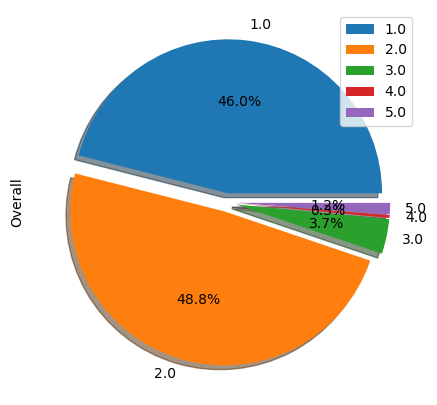

In [94]:
film.groupby('Overall')[['Overall']].count().plot(kind='pie',figsize=(5,5),subplots=True,autopct =  '%1.1f%%',shadow = True,explode = [0.06,0.06,0.06,0.06,0.06])
plt.show()

###  What factors are linked to satisfaction?

In [81]:
sf1 = film.Sinage.value_counts()
sf2 = film.Parking.value_counts()
sf3 = film.Clean.value_counts()

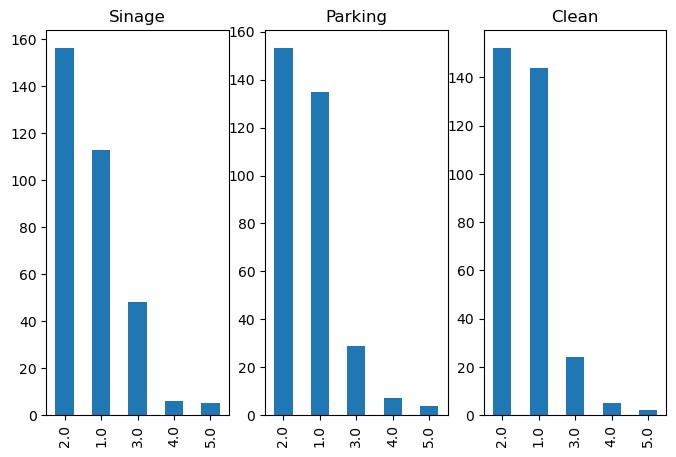

In [91]:
plt.figure(figsize=(8,5))
plt.subplot(1,3,1)
sf1.plot(kind='bar')
plt.title('Sinage')
plt.subplot(1,3,2)
sf2.plot(kind='bar')
plt.title('Parking')
plt.subplot(1,3,3)
sf3.plot(kind='bar')
plt.title('Clean')
plt.show()

###  What is the demographic profile of Film on the Rocks patrons?

In [97]:
d1 = film.Gender.value_counts()
d2 = film.Marital_Status.value_counts()
d3 = film.Age.value_counts()
d4 = film.Income.value_counts()

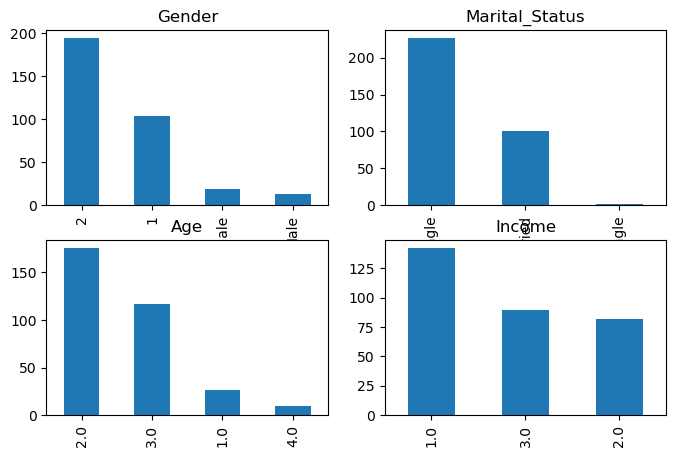

In [99]:
plt.figure(figsize=(8,5))
plt.subplot(2,2,1)
d1.plot(kind='bar')
plt.title('Gender')
plt.subplot(2,2,2)
d2.plot(kind='bar')
plt.title('Marital_Status')
plt.subplot(2,2,3)
d3.plot(kind='bar')
plt.title('Age')
plt.subplot(2,2,4)
d4.plot(kind='bar')
plt.title('Income')
plt.show()

###  In what media outlet(s) should the film series be advertised?


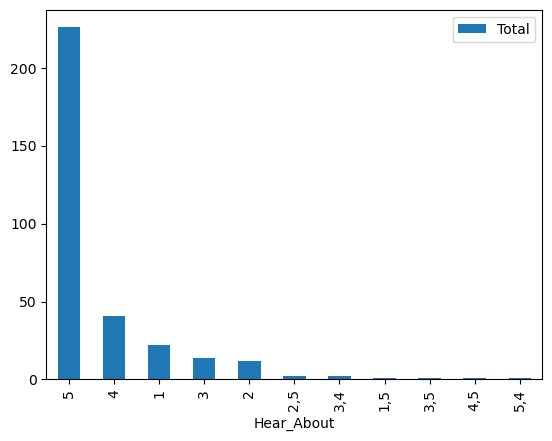

In [113]:
advertise = film.groupby('Hear_About')[['_rowstate_']].count().sort_values(by = '_rowstate_',ascending = False)
advertise.rename(columns = {'_rowstate_':'Total'},inplace=True)
advertise.plot(kind='bar')
plt.show()

Best way to advertise film is word of mouth.